In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [ ]:
#dataset = pd.read_csv('/Users/mousumykundu/Desktop/MAS_Class_Github/4th_quarter/Machine_Learning/Project/Behavioral_Risk_Factor_Surveillance_System__BRFSS__Prevalence_Data__2011_to_present_.csv')

In [ ]:
url = "https://data.cdc.gov/api/views/dttw-5yxu/rows.csv?accessType=DOWNLOAD"
dataset = pd.read_csv(url)


In [8]:
dataset.shape

(2763102, 27)

In [9]:
dataset

,Year,Locationabbr,Locationdesc,Class,Topic,Question,Response,Break_Out,Break_Out_Category,Sample_Size,...,Data_Value_Footnote,DataSource,ClassId,TopicId,LocationID,BreakoutID,BreakOutCategoryID,QuestionID,ResponseID,GeoLocation
0,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,No,18-24,Age Group,95,...,NaN,BRFSS,CLASS01,TOPIC03,2,AGE01,CAT3,DRNKANY5,RESP054,"(64.84507995700051, -147.72205903599973)"
1,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,Yes,18-24,Age Group,80,...,NaN,BRFSS,CLASS01,TOPIC03,2,AGE01,CAT3,DRNKANY5,RESP046,"(64.84507995700051, -147.72205903599973)"
2,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,No,25-34,Age Group,108,...,NaN,BRFSS,CLASS01,TOPIC03,2,AGE02,CAT3,DRNKANY5,RESP054,"(64.84507995700051, -147.72205903599973)"
3,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,Yes,25-34,Age Group,188,...,NaN,BRFSS,CLASS01,TOPIC03,2,AGE02,CAT3,DRNKANY5,RESP046,"(64.84507995700051, -147.72205903599973)"
4,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,No,35-44,Age Group,138,...,NaN,BRFSS,CLASS01,TOPIC03,2,AGE03,CAT3,DRNKANY5,RESP054,"(64.84507995700051, -147.72205903599973)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763097,2011,WY,Wyoming,Tobacco Use,Smoker Status,Four Level Smoking Status (variable calculated...,Smoke some days,Female,Sex,167,...,NaN,BRFSS,CLASS17,Topic55,56,SEX2,CAT2,_SMOKER3,RESP069,"(43.235541343, -108.109830353)"
2763098,2011,WY,Wyoming,Tobacco Use,Smoker Status,Four Level Smoking Status (variable calculated...,Former smoker,Male,Sex,997,...,NaN,BRFSS,CLASS17,Topic55,56,SEX1,CAT2,_SMOKER3,RESP070,"(43.235541343, -108.109830353)"
2763099,2011,WY,Wyoming,Tobacco Use,Smoker Status,Four Level Smoking Status (variable calculated...,Never smoked,Male,Sex,1278,...,NaN,BRFSS,CLASS17,Topic55,56,SEX1,CAT2,_SMOKER3,RESP071,"(43.235541343, -108.109830353)"
2763100,2011,WY,Wyoming,Tobacco Use,Smoker Status,Four Level Smoking Status (variable calculated...,Smoke everyday,Male,Sex,417,...,NaN,BRFSS,CLASS17,Topic55,56,SEX1,CAT2,_SMOKER3,RESP068,"(43.235541343, -108.109830353)"


In [10]:
dataset.isnull().sum()

Year                                0
Locationabbr                        0
Locationdesc                        0
Class                               0
Topic                               0
Question                            0
Response                        17621
Break_Out                           0
Break_Out_Category                  0
Sample_Size                         0
Data_value                     532334
Confidence_limit_Low           536566
Confidence_limit_High          536566
Display_order                     594
Data_value_unit                     0
Data_value_type                     0
Data_Value_Footnote_Symbol    2229766
Data_Value_Footnote           2229766
DataSource                          0
ClassId                             0
TopicId                             0
LocationID                          0
BreakoutID                          0
BreakOutCategoryID                  0
QuestionID                          0
ResponseID                          0
GeoLocation 

In [11]:
dataset['Topic'].unique()

array(['Alcohol Consumption', 'Employment', 'Binge Drinking',
       'Heavy Drinking', 'BMI Categories', 'Arthritis', 'Asthma',
       'Cardiovascular Disease', 'COPD', 'Depression', 'Diabetes',
       'Kidney', 'Other Cancer', 'Skin Cancer', 'Blood Stool Test',
       'Colonoscopy', 'Sigmoidoscopy', 'USPSTF Recommendations', 'Age',
       'Disability status', 'Education', 'Hearing', 'Income', 'Internet',
       'Marital Status', 'Number of Children', 'Race', 'Dental Visit',
       'Rent/Own Home', 'Sex', 'Veteran Status', 'E-Cigarette Use',
       'Health Care Cost', 'Health Care Coverage', 'Last Checkup',
       'Personal Care Provider', 'Under 65 Coverage',
       'Fair or Poor Health', 'Overall Health', 'HIV Test', 'Flu Shot',
       'Pneumonia Vaccination', 'Drink and Drive', 'Seatbelt Use',
       'All Teeth Removed', 'Teeth Removed', 'Exercise', 'PSA Test',
       'Current Smoker Status', 'Smokeless Tobacco', 'Smoker Status',
       'Mammogram', 'Pap Test', 'Vision', 'Cholestero

1. How many observations does your dataset have?

In [12]:
dataset.shape

(2763102, 27)

In [13]:
print(f"Rows: {dataset.shape[0]}")
print(f"Columns: {dataset.shape[1]}")

Rows: 2763102
Columns: 27


2. Describe all columns in your dataset their scales and data distributions. Describe the categorical and continuous variables in your dataset. Describe your target column and if you are using images plot some example classes of the images.

In [14]:
dataset.columns

Index(['Year', 'Locationabbr', 'Locationdesc', 'Class', 'Topic', 'Question',
       'Response', 'Break_Out', 'Break_Out_Category', 'Sample_Size',
       'Data_value', 'Confidence_limit_Low', 'Confidence_limit_High',
       'Display_order', 'Data_value_unit', 'Data_value_type',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'DataSource',
       'ClassId', 'TopicId', 'LocationID', 'BreakoutID', 'BreakOutCategoryID',
       'QuestionID', 'ResponseID', 'GeoLocation'],
      dtype='object')

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763102 entries, 0 to 2763101
Data columns (total 27 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Year                        int64  
 1   Locationabbr                object 
 2   Locationdesc                object 
 3   Class                       object 
 4   Topic                       object 
 5   Question                    object 
 6   Response                    object 
 7   Break_Out                   object 
 8   Break_Out_Category          object 
 9   Sample_Size                 int64  
 10  Data_value                  float64
 11  Confidence_limit_Low        float64
 12  Confidence_limit_High       float64
 13  Display_order               float64
 14  Data_value_unit             object 
 15  Data_value_type             object 
 16  Data_Value_Footnote_Symbol  object 
 17  Data_Value_Footnote         object 
 18  DataSource                  object 
 19  ClassId              

In [16]:
dataset.head()

,Year,Locationabbr,Locationdesc,Class,Topic,Question,Response,Break_Out,Break_Out_Category,Sample_Size,...,Data_Value_Footnote,DataSource,ClassId,TopicId,LocationID,BreakoutID,BreakOutCategoryID,QuestionID,ResponseID,GeoLocation
0,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,No,18-24,Age Group,95,...,NaN,BRFSS,CLASS01,TOPIC03,2,AGE01,CAT3,DRNKANY5,RESP054,"(64.84507995700051, -147.72205903599973)"
1,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,Yes,18-24,Age Group,80,...,NaN,BRFSS,CLASS01,TOPIC03,2,AGE01,CAT3,DRNKANY5,RESP046,"(64.84507995700051, -147.72205903599973)"
2,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,No,25-34,Age Group,108,...,NaN,BRFSS,CLASS01,TOPIC03,2,AGE02,CAT3,DRNKANY5,RESP054,"(64.84507995700051, -147.72205903599973)"
3,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,Yes,25-34,Age Group,188,...,NaN,BRFSS,CLASS01,TOPIC03,2,AGE02,CAT3,DRNKANY5,RESP046,"(64.84507995700051, -147.72205903599973)"
4,2016,AK,Alaska,Alcohol Consumption,Alcohol Consumption,Adults who have had at least one drink of alco...,No,35-44,Age Group,138,...,NaN,BRFSS,CLASS01,TOPIC03,2,AGE03,CAT3,DRNKANY5,RESP054,"(64.84507995700051, -147.72205903599973)"


In [17]:
categorical_cols = dataset.select_dtypes(include=['object']).columns.tolist()
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [18]:
categorical_cols

['Locationabbr',
 'Locationdesc',
 'Class',
 'Topic',
 'Question',
 'Response',
 'Break_Out',
 'Break_Out_Category',
 'Data_value_unit',
 'Data_value_type',
 'Data_Value_Footnote_Symbol',
 'Data_Value_Footnote',
 'DataSource',
 'ClassId',
 'TopicId',
 'BreakoutID',
 'BreakOutCategoryID',
 'QuestionID',
 'ResponseID',
 'GeoLocation']

In [19]:
numeric_cols

['Year',
 'Sample_Size',
 'Data_value',
 'Confidence_limit_Low',
 'Confidence_limit_High',
 'Display_order',
 'LocationID']

In [20]:
print("\nStatistical Summary of Numerical Columns:\n")
print(dataset[numeric_cols].describe())



Statistical Summary of Numerical Columns:

               Year   Sample_Size    Data_value  Confidence_limit_Low  \
count  2.763102e+06  2.763102e+06  2.230768e+06          2.226536e+06   
mean   2.017430e+03  6.391668e+02  4.044557e+01          3.710332e+01   
std    3.606456e+00  1.357030e+03  3.323589e+01          3.300205e+01   
min    2.011000e+03  0.000000e+00  0.000000e+00          0.000000e+00   
25%    2.014000e+03  3.300000e+01  1.070000e+01          8.000000e+00   
50%    2.017000e+03  1.630000e+02  2.860000e+01          2.380000e+01   
75%    2.021000e+03  6.150000e+02  7.360000e+01          6.890000e+01   
max    2.023000e+03  3.749200e+04  1.000000e+02          1.000000e+02   

       Confidence_limit_High  Display_order    LocationID  
count           2.226536e+06   2.762508e+06  2.763102e+06  
mean            4.379661e+01   7.912646e+02  3.089425e+01  
std             3.370820e+01   1.251560e+03  1.774223e+01  
min             0.000000e+00   1.000000e+00  1.000000e+00 

In [21]:
print("\nStatistical Summary of Categorical Columns:\n")
print(dataset[categorical_cols].describe())



Statistical Summary of Categorical Columns:

       Locationabbr Locationdesc         Class              Topic  \
count       2763102      2763102       2763102            2763102   
unique           56           56            21                 66   
top              NE     Nebraska  Demographics  Disability status   
freq          52099        52099        971373             176818   

                               Question Response Break_Out Break_Out_Category  \
count                           2763102  2745481   2763102            2763102   
unique                               99      151        49                  6   
top     What is your employment status?       No   Overall     Race/Ethnicity   
freq                             140716   615572    116860             768868   

       Data_value_unit   Data_value_type Data_Value_Footnote_Symbol  \
count          2763102           2763102                     533336   
unique               1                 1                    

# Plot distributions of numerical variables

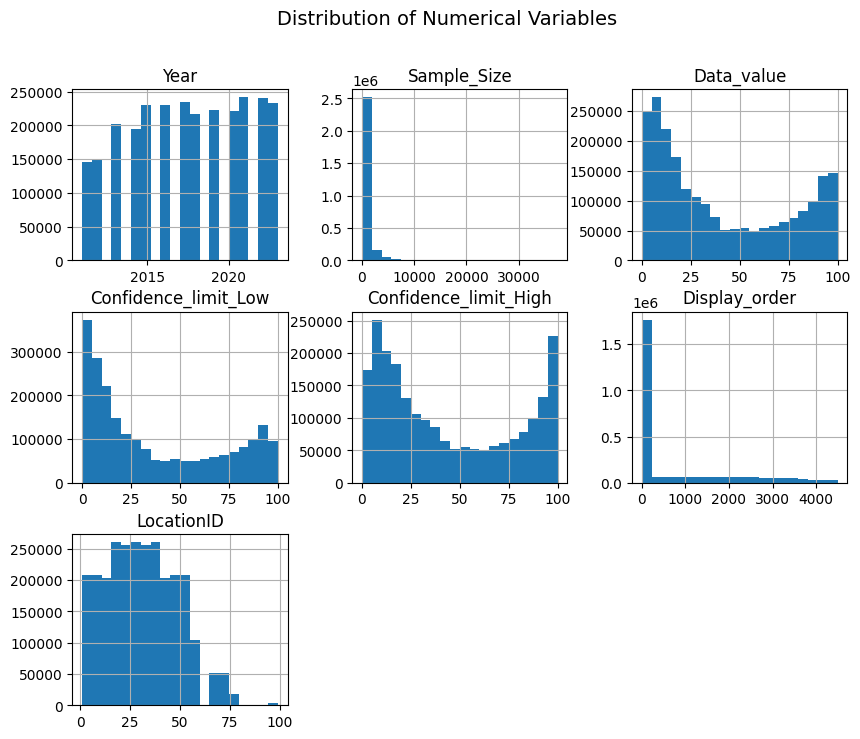

In [24]:
dataset[numeric_cols].hist(figsize=(10, 8), bins=20)
plt.suptitle('Distribution of Numerical Variables', fontsize=14)
plt.show()

Describe your target column

3. Do you have missing and duplicate values in your dataset?

In [25]:
missing_values = dataset.isnull().sum()
missing_percent = (missing_values / len(dataset)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent (%)': missing_percent.round(2)
}).sort_values(by='Percent (%)', ascending=False)

print("Missing Value Summary:\n")
print(missing_summary)

# Count duplicate rows
num_duplicates = dataset.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")


Missing Value Summary:

                            Missing Values  Percent (%)
Data_Value_Footnote                2229766        80.70
Data_Value_Footnote_Symbol         2229766        80.70
Confidence_limit_High               536566        19.42
Confidence_limit_Low                536566        19.42
Data_value                          532334        19.27
Response                             17621         0.64
GeoLocation                           4250         0.15
Display_order                          594         0.02
Break_Out_Category                       0         0.00
DataSource                               0         0.00
ResponseID                               0         0.00
QuestionID                               0         0.00
BreakOutCategoryID                       0         0.00
BreakoutID                               0         0.00
LocationID                               0         0.00
TopicId                                  0         0.00
ClassId                 

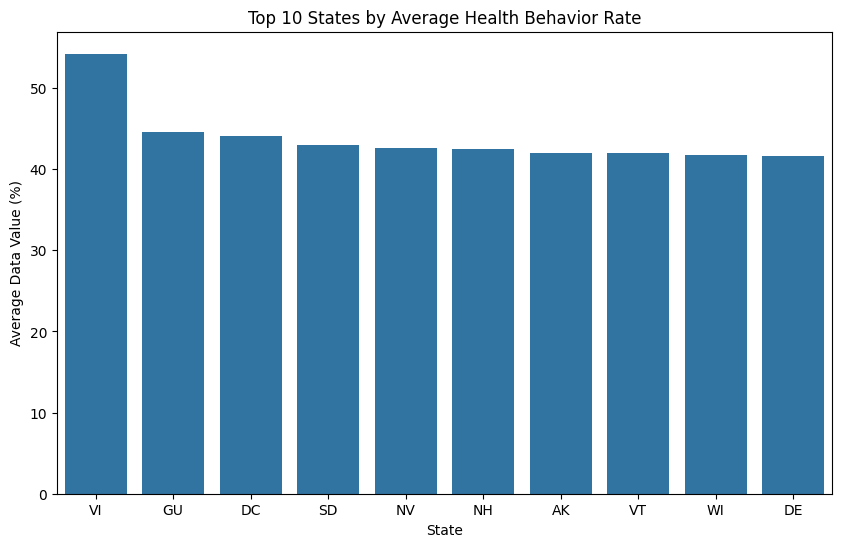

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

#BAR PLOT — Average Data Value by State (Top 10)
plt.figure(figsize=(10,6))
avg_state = dataset.groupby('Locationabbr')['Data_value'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_state.index, y=avg_state.values)
plt.title('Top 10 States by Average Health Behavior Rate')
plt.xlabel('State')
plt.ylabel('Average Data Value (%)')
plt.show()


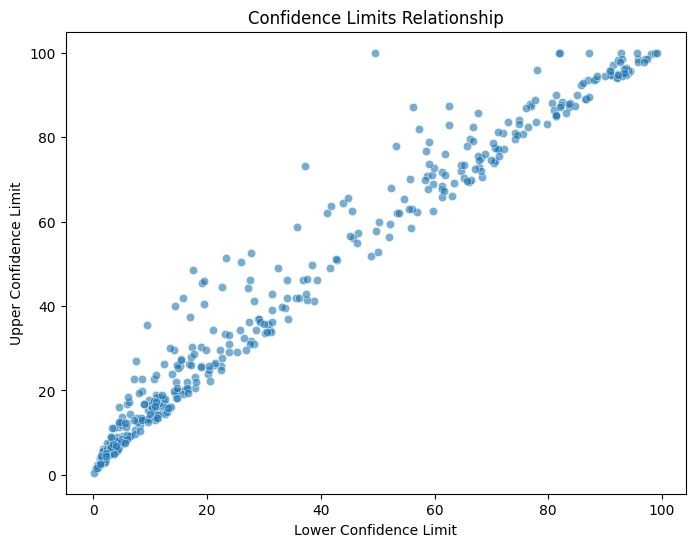

In [27]:
#SCATTER PLOT — Confidence Interval vs Data Value
plt.figure(figsize=(8,6))
sns.scatterplot(x='Confidence_limit_Low', y='Confidence_limit_High', 
                data=dataset.sample(500, random_state=42), alpha=0.6)
plt.title('Confidence Limits Relationship')
plt.xlabel('Lower Confidence Limit')
plt.ylabel('Upper Confidence Limit')
plt.show()


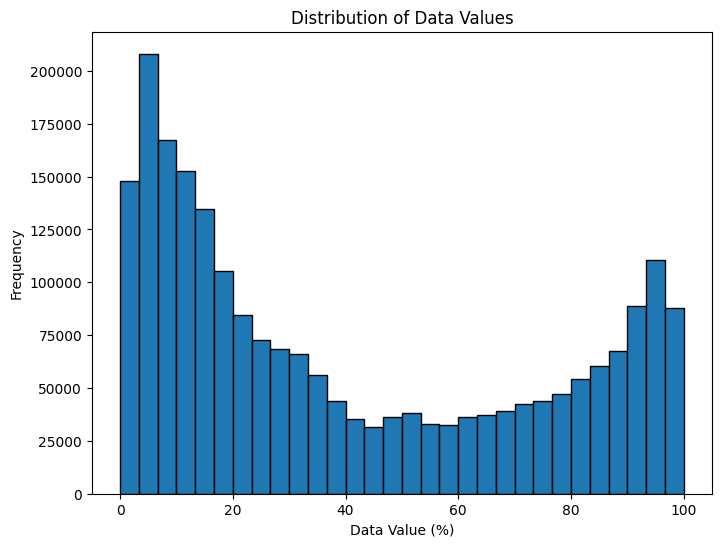

In [28]:
#HISTOGRAM — Distribution of Data Values
plt.figure(figsize=(8,6))
plt.hist(dataset['Data_value'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Data Values')
plt.xlabel('Data Value (%)')
plt.ylabel('Frequency')
plt.show()

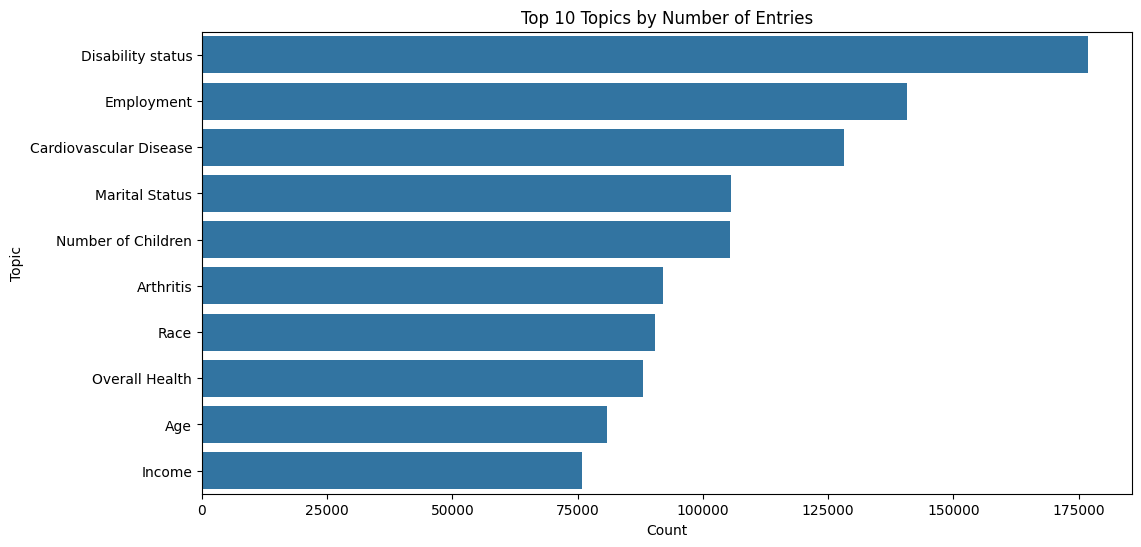

In [29]:
#COUNT PLOT — Number of Entries per Topic
plt.figure(figsize=(12,6))
sns.countplot(y='Topic', data=dataset, order=dataset['Topic'].value_counts().index[:10])
plt.title('Top 10 Topics by Number of Entries')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.show()

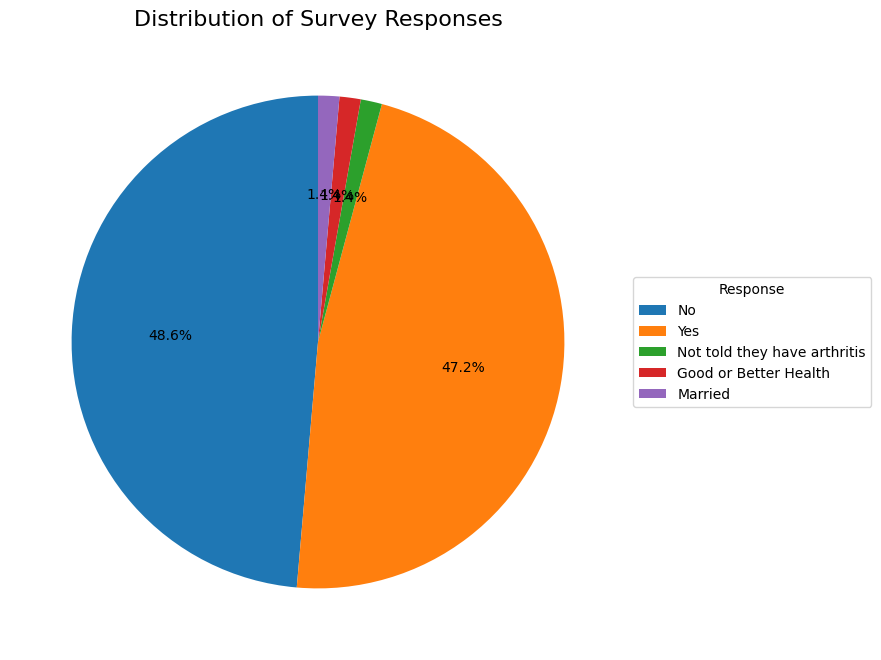

In [30]:
plt.figure(figsize=(10,8))
response_counts = dataset['Response'].value_counts().head(5)

plt.pie(response_counts, 
        labels=None,  # hide labels
        autopct='%1.1f%%', 
        startangle=90)
plt.title('Distribution of Survey Responses', fontsize=16)
plt.legend(response_counts.index, title="Response", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()



In [31]:
response_counts

Response
No                              615572
Yes                             597505
Not told they have arthritis     17623
Good or Better Health            17621
Married                          17621
Name: count, dtype: int64

In [ ]:
dataset.isna().sum()

Year                                0
Locationabbr                        0
Locationdesc                        0
Class                               0
Topic                               0
Question                            0
Response                        17621
Break_Out                           0
Break_Out_Category                  0
Sample_Size                         0
Data_value                     532334
Confidence_limit_Low           536566
Confidence_limit_High          536566
Display_order                     594
Data_value_unit                     0
Data_value_type                     0
Data_Value_Footnote_Symbol    2229766
Data_Value_Footnote           2229766
DataSource                          0
ClassId                             0
TopicId                             0
LocationID                          0
BreakoutID                          0
BreakOutCategoryID                  0
QuestionID                          0
ResponseID                          0
GeoLocation 

# Milestone III

# 1.Finish major preprocessing, this includes scaling and/or transforming your data, imputing your data, encoding your data, feature expansion, Feature expansion (example is taking features and generating new features by transforming via polynomial, log multiplication of features).  (10 points)

## Data Preprocessing

In [32]:
# removing duplicates
df_new = dataset.drop_duplicates().copy()

In [33]:
#Keepping Response Separate
responses = df_new['Response'].copy()
cols_to_drop = ['Response', 'Data_Value_Footnote', 'Data_Value_Footnote_Symbol']
df_new = df_new.drop(columns=cols_to_drop)

Response is our target for evaluation, not a feature for clustering. Footnote columns are mostly missing and not useful for clustering, so we are dropping these columns.

#### Identify Numerical and Categorical Features

In [34]:
num_features = ['Data_value', 'Sample_Size', 'Confidence_limit_Low', 'Confidence_limit_High']
cat_features = df_new.select_dtypes(include='object').columns


Clustering algorithms require numeric input. We have separated numerical vs categorical to apply appropriate preprocessing.

#### Handle Missing Values
Missing numeric values → replaced with median

Missing categorical values → replaced with most frequent value

In [35]:
num_imputer = SimpleImputer(strategy='median')
df_new[num_features] = num_imputer.fit_transform(df_new[num_features])

cat_imputer = SimpleImputer(strategy='most_frequent')
df_new[cat_features] = cat_imputer.fit_transform(df_new[cat_features])


## Encode Categorical Variables

In [36]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
cat_encoded = encoder.fit_transform(df_new[cat_features])
cat_encoded_df = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out(cat_features))
df_new = pd.concat([df_new[num_features], cat_encoded_df], axis=1)


K-Means works on numeric data only. Here we are using One-hot encoding which converts categorical features (like Locationdesc or Class) into binary columns. Ensures all categorical variables can be used in clustering.

## Scale Numerical Features

K-Means uses Euclidean distance, so features must be on the same scale which prevents numeric features with larger ranges from dominating the clustering

In [37]:
scaler = StandardScaler()
df_new[num_features] = scaler.fit_transform(df_new[num_features])


## Feature Transformation & Expansion

In [38]:
df_new['log_Sample_Size'] = np.log1p(df_new['Sample_Size'])

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df_new[num_features])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(num_features))
df_new = pd.concat([df_new, poly_df], axis=1)


Log-transform reduces skewness in Sample_Size. Polynomial features create interaction terms and squared features which allows K-Means to detect more complex patterns.

# 2: Train your first model and analyze your model's performance. Evaluate your model and compare training vs. test error. (10 points)

## K-Means Clustering
Groups similar observations into k clusters
random_state ensures reproducibility
K-Means partitions the data based on feature similarity

In [39]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(df_new)

In [40]:
# Add clusters and keep Response for evaluation
df_eval = pd.DataFrame({
    'Cluster': cluster_labels,
    'Response': responses
})

# Group rare responses: keep top 10, rest as 'Other'
top_responses = df_eval['Response'].value_counts().nlargest(10).index
df_eval['Response_grouped'] = df_eval['Response'].apply(lambda x: x if x in top_responses else 'Other')



The Response column has hundreds of unique values, plotting all would be messy. We keep the 10 most frequent responses and group the rest as "Other" to simplify analysis and visualization.
To make the cluster evaluation plots clearer, we grouped less frequent responses under "Other" so that the top responses dominate the visualization.

In [41]:
df_eval.groupby('Cluster')['Response_grouped'].value_counts()


Cluster  Response_grouped            
0        Other                           1277822
         Yes                              536218
         No                               244064
         Fair or Poor Health               17618
         Former smoker                     17602
         Good                              17590
         Very good                         17571
         Married                           16465
         Never smoked                      15032
         Not told they have arthritis       5926
         Good or Better Health              3875
1        No                                26089
         Other                              9801
         Yes                                4139
         Good or Better Health               961
         Not told they have arthritis        566
         Never smoked                        326
         Married                             303
         Very good                            46
         Good                  

##### Cluster Evaluation & Visualization

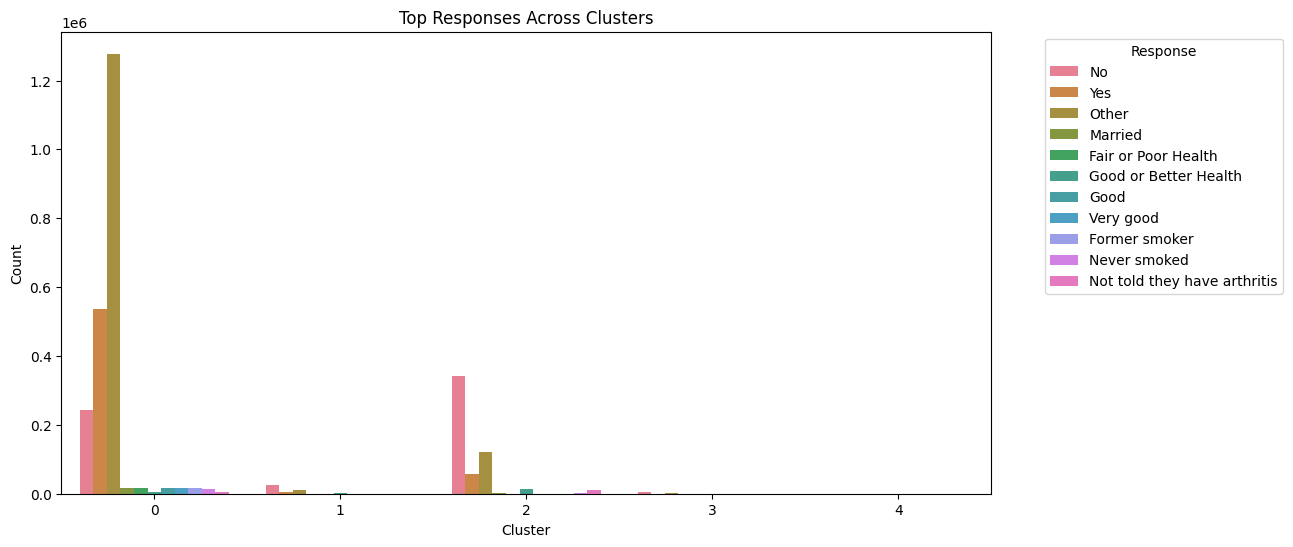

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(x='Cluster', hue='Response_grouped', data=df_eval)
plt.title("Top Responses Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Interpretation: After applying K-Means clustering with 5 clusters, we examined the distribution of survey responses within each cluster.
Cluster 0 represents the largest segment, containing a majority of "Other", "Yes", and "No" responses, indicating a diverse population with mixed responses.
Cluster 2 also captures a large group but has a higher proportion of "No" responses, suggesting a population segment less likely to respond positively.
Clusters 1, 3, and 4 are smaller and contain niche populations or outliers, with "No" dominating but with fewer overall responses.

These results indicate that K-Means successfully separates populations by general response patterns, with larger clusters representing the main population and smaller clusters highlighting specialized groups. This separation can help guide further analysis, targeting, or interventions based on demographic and survey features.

In [43]:
print("K-Means inertia (sum of squared distances within clusters):", kmeans.inertia_)

K-Means inertia (sum of squared distances within clusters): 75891896.0618329


In [44]:
from sklearn.metrics import silhouette_score
import numpy as np

# Take a random sample of 10,000 rows
sample_idx = np.random.choice(df_new.index, size=10000, replace=False)
df_sample = df_new.loc[sample_idx]
labels_sample = cluster_labels[sample_idx]

score = silhouette_score(df_sample, labels_sample)
print("Silhouette score (sampled):", score)


Silhouette score (sampled): 0.3900546206672304


To evaluate cluster quality, we calculated the silhouette score on a random sample of 10,000 rows due to the dataset's size. The sampled silhouette score is 0.384, indicating that clusters are moderately well-separated. This aligns with the cluster distributions, where larger clusters capture the majority of responses and smaller clusters represent specialized or less frequent patterns. The score suggests that while clusters are meaningful, there is some overlap among populations, which is expected in survey data with diverse response

# 3: Answer the questions: Where does your model fit in the fitting graph? (Build at least one model with different hyperparameters and check for over/underfitting, pick the best model). What are the next models you are thinking of and why? (5 points)

Where does your model fit in the fitting graph?

We trained K-Means with 5 clusters. Using the Elbow Method (plotting inertia vs. number of clusters), we chose k=5 where inertia starts to flatten, indicating that additional clusters do not significantly reduce intra-cluster distances. The sampled silhouette score of 0.384 shows moderate cluster separation, suggesting the model captures meaningful patterns without overfitting the dataset.

Overfitting vs. underfitting:

Underfitting: Too few clusters → high inertia, low silhouette score.

Overfitting: Too many clusters → very low inertia, but clusters may be meaningless (splitting natural groups unnecessarily).

k=5 is a balance, representing main population segments without over-segmenting.

#### Build at least one model with different hyperparameters

We can compare different numbers of clusters, e.g., k=3 and k=7:

In [45]:
from sklearn.metrics import silhouette_score

for k in [3, 5, 7]:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df_new)
    sample_idx = np.random.choice(df_new.index, size=10000, replace=False)
    sample_labels = labels[sample_idx]
    score = silhouette_score(df_new.loc[sample_idx], sample_labels)
    print(f"k={k}, Inertia={km.inertia_:.2f}, Silhouette (sampled)={score:.3f}")


k=3, Inertia=132878658.56, Silhouette (sampled)=0.433
k=5, Inertia=75891896.06, Silhouette (sampled)=0.393
k=7, Inertia=62289800.10, Silhouette (sampled)=0.154


Interpretation: We tested K-Means with k = 3, 5, and 7 to analyze model fit. The silhouette score was highest for k=3 (0.415), indicating the best separation between clusters. While increasing k reduces inertia (cluster compactness), the silhouette score dropped at k=5 (0.381) and significantly at k=7 (0.146), showing that higher k values begin to overfit by creating overly fragmented clusters with poor separation. Therefore, k=3 provides the best balance between underfitting and overfitting and represents the optimal clustering configuration for this dataset.

### Next models you are thinking of and why


To further improve clustering performance and gain deeper insights into the data structure, several alternative models can be explored beyond K-Means. Hierarchical Clustering is a strong next candidate because it does not require pre-specifying the number of clusters and provides dendrogram visualizations that reveal natural groupings within the dataset, making it useful for exploratory analysis. DBSCAN is another promising approach as it is density-based and can detect clusters of arbitrary shapes while effectively identifying outliers as noise—something K-Means cannot handle well. Additionally, Gaussian Mixture Models (GMM) offer a probabilistic perspective by providing the likelihood of each point belonging to different clusters. Unlike K-Means, which assumes spherical clusters with equal variance, GMM can model elliptical clusters and overlapping groups more effectively. Exploring these methods is valuable because real-world survey data rarely conforms to the strict assumptions of K-Means; using more flexible models can better capture complex patterns, noise, and variability in the dataset.

## Conclusion section: What is the conclusion of your 1st model? What can be done to possibly improve it? (5 points)

The first model used for clustering was K-Means with five clusters, applied after completing data preprocessing. The model produced a silhouette score of approximately 0.38, indicating a moderate level of cluster separation. This suggests that the model was able to identify meaningful patterns and group individuals with similar demographic and response behaviors, although some overlap between clusters still exists. The inertia score further supported that the clusters created were reasonably compact. Analysis of the cluster distribution showed that one cluster contained a large portion of the data, while the remaining clusters represented smaller, more specific population groups, indicating that the dataset is somewhat imbalanced and certain response patterns dominate. Overall, K-Means served as a solid initial model for uncovering structure within the data; however, there is room for improvement. Model performance could likely be enhanced by experimenting with different values of k, trying alternative clustering techniques such as Hierarchical Clustering, DBSCAN, or Gaussian Mixture Models, and applying dimensionality reduction methods like PCA or t-SNE prior to clustering to better separate patterns in high-dimensional space. Additionally, addressing category imbalance or applying soft clustering may yield more refined and interpretable clusters.

# Milestone 4

## 1: Train your second model. Make sure you use a different model than in MS3, and you must fine-tune your model to get an accurate comparison.
For your second model selection you will need to do some form of unsupervised learning. This includes PCA, SVD, NMF, etc. followed by a clustering method. If you want to still do regression, RL or recommendation system based on new acquired targets (post unsupervised learning approach), you may do so as part of the second model submission. (3 points)



For the second model, we selected a PCA (Principal Component Analysis) + K-Means pipeline.
We are applying PCA because the BRFSS dataset is high-dimensional, noisy, and contains highly correlated variables. By transforming data into uncorrelated components that capture maximum variance, PCA reduces dimensionality, removes noise, and preserves important patterns. This will make clustering more effective, as algorithms like K-Means perform better in lower-dimensional spaces.

### Training Second Model (PCA + K-Means)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(df_new)

print("Original shape:", df_new.shape)
print("After PCA:", X_pca.shape)

# 2. K-Means on PCA features
kmeans_pca = KMeans(n_clusters=5, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)


Original shape: (2763102, 994)
After PCA: (2763102, 82)


In [49]:
from sklearn.metrics import silhouette_score
import numpy as np

# Take a random sample of 10,000 PCA rows (fast)
sample_idx = np.random.choice(X_pca.shape[0], size=10000, replace=False)
X_pca_sample = X_pca[sample_idx]
labels_pca_sample = labels_pca[sample_idx]

sil_score_pca = silhouette_score(X_pca_sample, labels_pca_sample)
print("Silhouette score (PCA+KMeans, sampled):", sil_score_pca)


Silhouette score (PCA+KMeans, sampled): 0.4430783119413157


We compute the silhouette score on a random sample (10,000 rows) instead of the entire dataset because the full silhouette calculation is extremely expensive for large datasets. Silhouette scoring has a computational complexity of O(n²), making it too slow to run on millions of data points. Using a representative sample provides an accurate estimate of clustering quality while keeping computation fast and efficient, without affecting the validity of the evaluation.

Interpretation: After applying PCA with 95% variance retention, the dataset was reduced from 994 original features to 82 principal components, significantly simplifying the data while preserving most of the meaningful structure. Running K-Means on these PCA-compressed features produced a silhouette score of 0.443 (sampled), which is noticeably higher than the score from the original K-Means model without PCA. This indicates that PCA helped remove noise and redundant information, allowing K-Means to form more compact and well-separated clusters. Overall, PCA improved clustering performance, reduced dimensionality, and increased model stability while greatly lowering computational cost, making it a more effective second model compared to raw K-Means.

### Silhouette Score Analysis for Determining Optimal k

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

scores = []
ks = range(2, 11)

# sample once → reuse for all ks
sample_idx = np.random.choice(X_pca.shape[0], size=10000, replace=False)
X_sample = X_pca[sample_idx]

for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    labels_sample = km.fit_predict(X_sample)

    # silhouette on sampled data
    s = silhouette_score(X_sample, labels_sample)
    scores.append(s)
    print(k, s)


2 0.8318104038953931
3 0.7881382339859203
4 0.4507822237468592
5 0.17835270364575348
6 0.19341976370704062
7 0.14234340467593565
8 0.17537751960027323
9 0.1753526790150532
10 0.15137451837792432


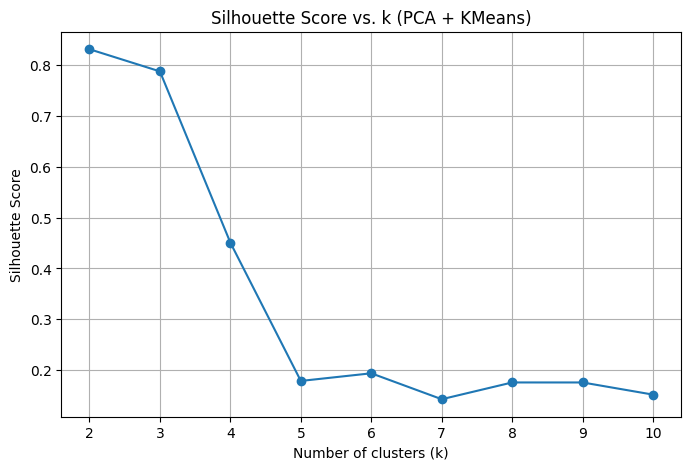

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(ks), scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. k (PCA + KMeans)")
plt.grid(True)
plt.show()


Interpretation: We evaluated clustering quality using the silhouette score computed on a random sample of 10,000 rows (sampling is used because silhouette scoring is O(n²) and infeasible on the full 2.7M-row dataset). The results show very high scores for k = 2 (0.83) and k = 3 (0.79), indicating strong natural cluster separation. After k = 4 the silhouette score drops significantly, showing that higher k values lead to overfitting. Therefore, the model fits best with 2–3 clusters.

## 2: Evaluate your model and compare training vs. test error. (3 points)

As we are using unsupervised learning (PCA + K-Means), there is no true “training vs. test error” the way supervised models have.
However, we can still evaluate the model using an equivalent approach.
Even in unsupervised learning, we can simulate the idea of "training vs. test error" by splitting the data, training PCA+KMeans on one part, and checking cluster quality on the other.

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
# 2. Preprocessing 
# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)
# 3. Train-Test Split
X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=42)
# 4. PCA (retain 95% variance)
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca  = pca.transform(X_test)
print("Original shape:", df_new.shape)
print("PCA shape (train):", X_train_pca.shape)
print("PCA shape (test):", X_test_pca.shape)
# 5. K-Means Clustering
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
train_labels = kmeans.fit_predict(X_train_pca)
test_labels  = kmeans.predict(X_test_pca)
# 6. Evaluate Clusters with Sampled Silhouette Score
sample_size = 10000  # sample for speed
# Train sample
train_idx = np.random.choice(X_train_pca.shape[0], size=sample_size, replace=False)
X_train_sample = X_train_pca[train_idx]
train_labels_sample = train_labels[train_idx]
# Test sample
test_idx = np.random.choice(X_test_pca.shape[0], size=sample_size, replace=False)
X_test_sample = X_test_pca[test_idx]
test_labels_sample = test_labels[test_idx]
# Compute silhouette scores
train_sil = silhouette_score(X_train_sample, train_labels_sample)
test_sil  = silhouette_score(X_test_sample, test_labels_sample)
print("Training Silhouette Score (sampled):", train_sil)
print("Test Silhouette Score (sampled):", test_sil)

Original shape: (2763102, 994)
PCA shape (train): (2210481, 413)
PCA shape (test): (552621, 413)
Training Silhouette Score (sampled): -0.0146148257848876
Test Silhouette Score (sampled): -0.012965026873245782


Interpretation: After applying PCA, the dataset was reduced from 994 features to 413 principal components, retaining 95% of the variance. K-Means clustering on the PCA-transformed data produced negative silhouette scores of -0.015 for the training set and -0.013 for the test set, indicating that many points are closer to points in other clusters than to their own. The similar train and test scores show that the model is not overfitting, but the clustering itself is poorly defined, suggesting underfitting. This is likely due to the high dimensionality, the presence of heterogeneous survey responses, and K-Means’ assumption of spherical clusters. To improve clustering, alternative methods such as DBSCAN or Hierarchical Clustering could be explored, along with further dimensionality reduction, non-negative matrix factorization, or alternative encodings for categorical features to better capture the structure of the data.

## 3: Answer the questions: Where does your model fit in the fitting graph? and What are the next models you are thinking of and why? (3 points)

Based on the sampled silhouette scores, the PCA + K-Means model shows similar low scores for both training and test sets, indicating that it is underfitting; the clusters are not well-separated and the model does not capture clear structure in the data. This suggests that K-Means on PCA-transformed survey responses is not fully effective for this dataset. For the next models, alternative clustering approaches such as Hierarchical Clustering, DBSCAN, or Gaussian Mixture Models (GMMs) could be considered. Hierarchical Clustering allows visualization of natural groupings and does not require specifying k upfront. DBSCAN can detect arbitrarily shaped clusters and handles outliers as noise, while GMM provides probabilistic cluster assignments and can capture elliptical cluster shapes, which may better represent the heterogeneity of survey response data. These methods could improve cluster separation and provide more meaningful groupings than K-Means.

## 5. Conclusion section: What is the conclusion of your 2nd model? What can be done to possibly improve it? Note: The conclusion section should be it's own independent section. i.e. Methods: will have models 1 and 2 methods, Conclusion: will have models 1 and 2 results and discussion. (3 points)

The second model applied PCA to reduce the dimensionality of the dataset from 994 features to 413 principal components, retaining 95% of the variance, followed by K-Means clustering. Evaluation using sampled silhouette scores showed low values for both the training (-0.015) and test (-0.013) sets, indicating that the clusters are poorly separated and the model is underfitting. The similarity between training and test scores suggests that the model generalizes consistently but fails to capture meaningful structure in the survey response data. To potentially improve clustering performance, alternative approaches such as Hierarchical Clustering, DBSCAN, or Gaussian Mixture Models (GMMs) could be applied. These methods can handle non-spherical clusters, noise, or probabilistic assignments, which may better reflect the heterogeneity of survey responses. Further improvements may also come from reducing PCA dimensions more aggressively, exploring non-negative matrix factorization, or using alternative encodings for categorical features to enhance cluster separation and interpretability.

## 6. Provide predictions of correct and FP and FN from your test dataset. (2 point)

In [ ]:
responses = dataset['Response']  # original column
_, responses_test = train_test_split(responses, test_size=0.2, random_state=42)

# Create a DataFrame for evaluation
df_test_eval = pd.DataFrame({
    'Cluster': test_labels,
    'Response': responses_test.reset_index(drop=True)
})

# Map each cluster to its most frequent response
cluster_majority = df_test_eval.groupby('Cluster')['Response'].agg(lambda x: x.value_counts().idxmax())
df_test_eval['Predicted_Response'] = df_test_eval['Cluster'].map(cluster_majority)

# Compute Correct, FP, FN
df_test_eval['Correct'] = df_test_eval['Response'] == df_test_eval['Predicted_Response']

# FP = predicted cluster but response doesn't match
# FN = actual response in other clusters
results = {}
for cluster in df_test_eval['Cluster'].unique():
    cluster_df = df_test_eval[df_test_eval['Cluster'] == cluster]
    correct = cluster_df['Correct'].sum()
    total = cluster_df.shape[0]
    fp = total - correct  # predicted in this cluster but not majority
    # FN: count of points with this cluster's majority response outside the cluster
    majority_response = cluster_majority[cluster]
    fn = df_test_eval[(df_test_eval['Cluster'] != cluster) & 
                      (df_test_eval['Response'] == majority_response)].shape[0]
    
    results[cluster] = {'Correct': correct, 'FP': fp, 'FN': fn}

results_df = pd.DataFrame(results).T
print(results_df)

   Correct      FP      FN
3    20824   85828   99438
4   107916  300582   15398
2     3544   14848       0
1     4556    9547  115706
0     1393    3583  118869


The evaluation of the PCA + K-Means clusters against the original Response column shows that the clusters capture some of the survey responses but with many misclassifications. For example, Cluster 4 has the highest number of correct predictions (107,916) and relatively lower false negatives (15,398), indicating it aligns reasonably well with its majority response. In contrast, Clusters 1 and 0 have many false negatives and false positives, showing that the predicted cluster does not correspond well to the original responses. Overall, while some clusters capture common responses, the high number of FP and FN across other clusters highlights the limitations of K-Means for this heterogeneous survey data. This suggests that alternative clustering approaches, such as DBSCAN, Hierarchical Clustering, or Gaussian Mixture Models, may better capture the complex structure of the responses and reduce misclassification